In [1]:
# to activate functions that are needed for this program
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pyvis.network import Network
import datetime as dt
import numpy as np


In [2]:
# importing the data file into the program
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0VY2EN/bread%20basket.csv")
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [3]:
# reading the data structure to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
# after identifying the data type of each column, transform them to the correct data types
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2464\902279976.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [5]:
# the 'date_time' column has been transformed to the correct data type
# look the before after 'date_time' rows
df['date_time']

0       2016-10-30 09:58:00
1       2016-10-30 10:05:00
2       2016-10-30 10:05:00
3       2016-10-30 10:07:00
4       2016-10-30 10:07:00
                ...        
20502   2017-04-09 14:32:00
20503   2017-04-09 14:32:00
20504   2017-04-09 14:57:00
20505   2017-04-09 14:57:00
20506   2017-04-09 15:04:00
Name: date_time, Length: 20507, dtype: datetime64[ns]

In [6]:
# create new columns for time components that will be useful in subsequent analysis
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour

In [7]:
# the purpose still same as before
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [8]:
# same
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [9]:
# count the occurrence of each item to understand their popularity
# for the example, Coffee is the most purchased item.
popular = df['Item'].value_counts()
df['Item'].value_counts(normalize=True) * 100

Item
Coffee            26.678695
Bread             16.213976
Tea                6.997611
Cake               4.998293
Pastry             4.174184
                    ...    
Bacon              0.004876
Gift voucher       0.004876
Olum & polenta     0.004876
Raw bars           0.004876
Polenta            0.004876
Name: proportion, Length: 94, dtype: float64

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


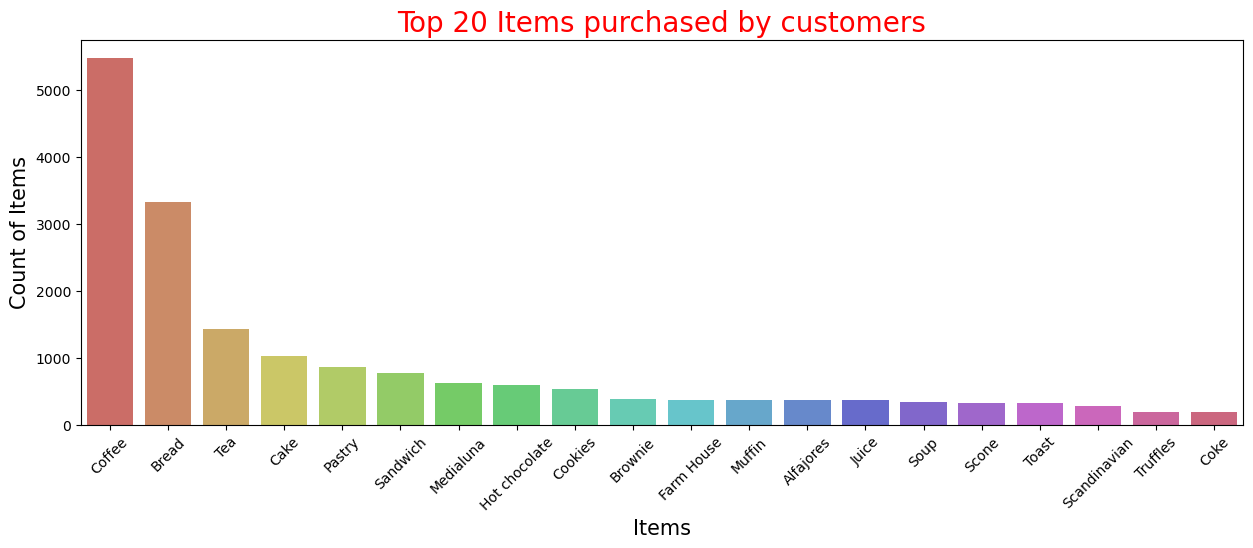

In [10]:
# visualizing it
plt.figure(figsize=(15,5))
sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red', size = 20)
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


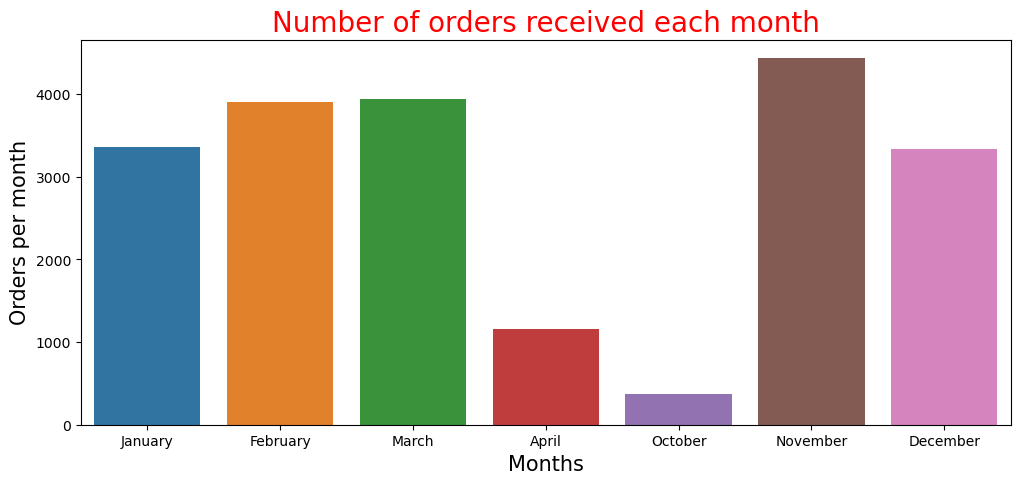

In [11]:
# same
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran[['month name', 'Transaction']], x = "month name", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'red', size = 20)
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


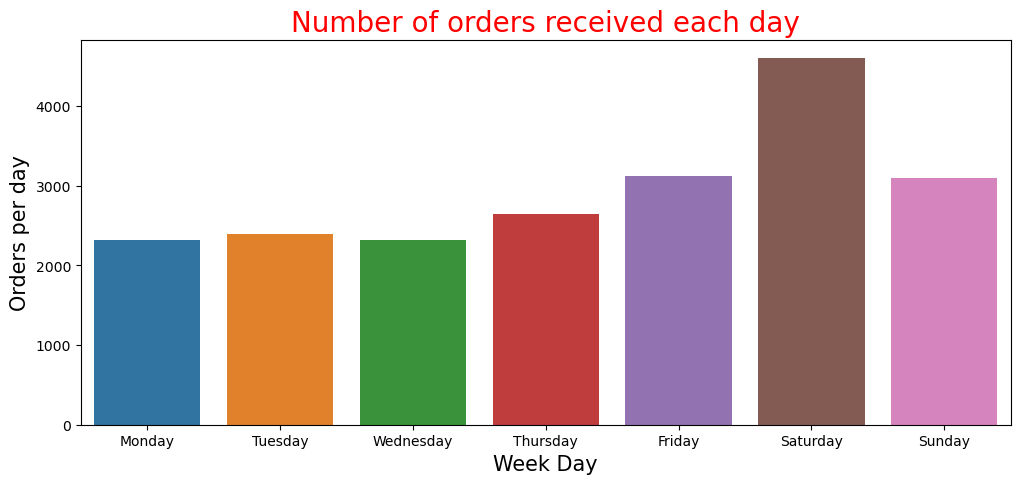

In [12]:
# same
weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran[['weekday name', 'Transaction']], x = "weekday name", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'red', size = 20)
plt.show()

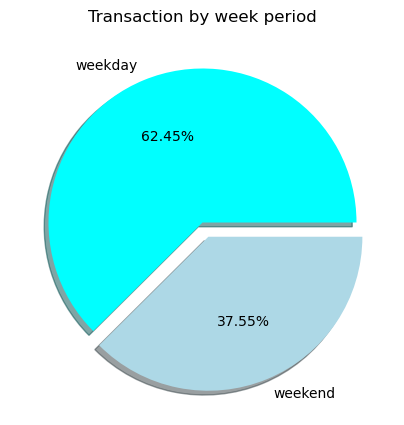

In [13]:
# same but pie
size = df['weekday_weekend'].value_counts()
label = size.index.values
color = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.figure(figsize=(12,5))
plt.pie(size, labels = label, colors = color, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Transaction by week period')
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


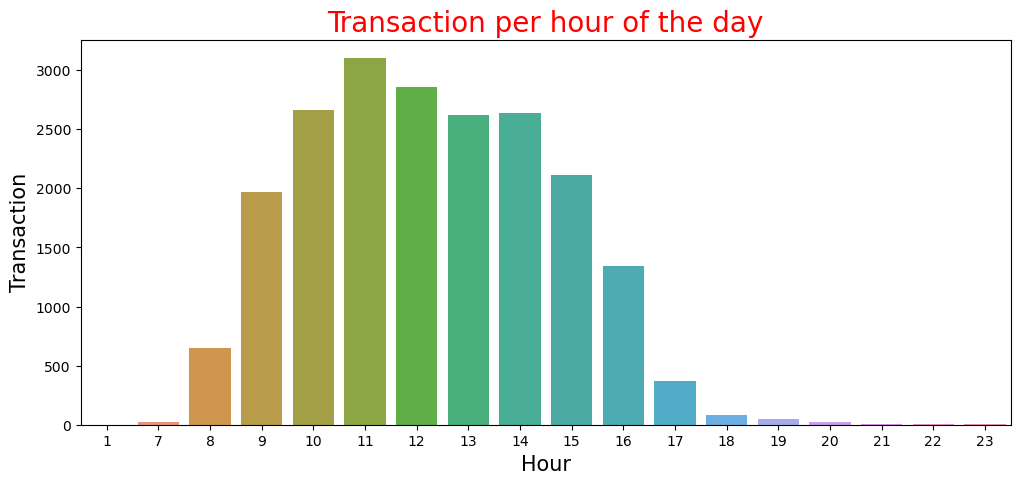

In [14]:
# same
countbyhour=df.groupby('hour')['Transaction'].count().reset_index()
countbyhour.sort_values('hour',inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=countbyhour, x='hour', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


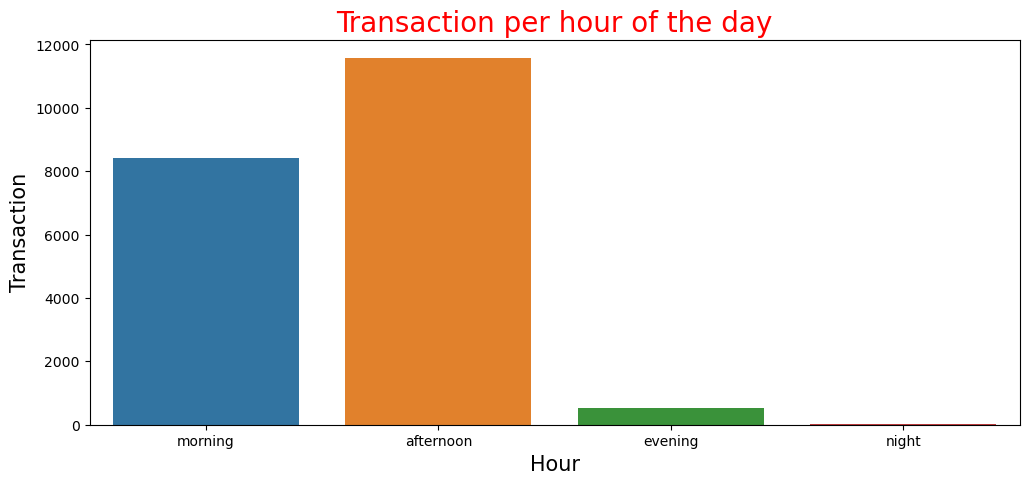

In [15]:
# same
countbyweekday=df.groupby('period_day')['Transaction'].count().reset_index()
countbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]
countbyweekday.sort_values("dayorder",inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(data=countbyweekday, x='period_day', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

In [16]:
# now, we count the occurrences of each item in every transaction
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [17]:
# transform the data to help us in subsequent analysis. 
basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# this is just only convert the numerical values in the basket to boolean values for better analysis
def encode_units(x): 
    if(x==0): 
        return False
    if(x>0): 
        return True
    
basket_sets = basket.applymap(encode_units)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2464\2881429346.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# taking the items for each transaction
transactions=[]
for item in df['Transaction'].unique():
    lst=list(set(df[df['Transaction']==item]['Item']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Cookies', 'Jam'],
 ['Muffin'],
 ['Bread', 'Pastry', 'Coffee'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Tea', 'Pastry', 'Coffee'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian']]

In [20]:
# same as basket_sets, this is just another way
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
basket_sets_2 = pd.DataFrame(encodedData, columns=te.columns_)
basket_sets_2

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# this is already in new chapter, we were using apriori algorithm this time
# this is identify frequent items in the dataset
# we set minimum for support 0.01
frequentItems= apriori(basket_sets, use_colnames=True, min_support=0.01)
frequentItems.sort_values("support", ascending=False)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
...,...,...
11,0.010565,(Hearty & Seasonal)
20,0.010460,(Salad)
30,0.010354,"(Bread, Alfajores)"
58,0.010037,"(Bread, Cake, Coffee)"


In [22]:
# generating association rules based on the confidence metric.
rules = association_rules(frequentItems, metric="confidence", min_threshold=0.2)
rules.sort_values('confidence', ascending = False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
22,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
20,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [23]:
# Filtering the rules to include only those with a lift value greater than 1.
rules[rules["lift"]>1].sort_values("support",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


In [24]:
# to analyze what products are bought together the most frequently.
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems[frequentItems["antecedent_len"]>1].sort_values(by=["antecedent_len","support"], ascending=False)

,support,itemsets,antecedent_len
59,0.011199,"(Bread, Pastry, Coffee)",3
58,0.010037,"(Bread, Cake, Coffee)",3
60,0.010037,"(Tea, Cake, Coffee)",3
34,0.090016,"(Bread, Coffee)",2
42,0.054728,"(Cake, Coffee)",2
55,0.049868,"(Tea, Coffee)",2
50,0.047544,"(Pastry, Coffee)",2
51,0.038246,"(Sandwich, Coffee)",2
48,0.035182,"(Medialuna, Coffee)",2
46,0.029583,"(Hot chocolate, Coffee)",2


In [25]:
# we want to see other rules can make without involving coffee as a consequent, because coffee can be recommended to almost every item
index_names = rules['consequents'] == frozenset({'Coffee'})
refinedRules = rules[~index_names].sort_values('lift', ascending=False)
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index()
refinedRules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhangs_metric
0,30,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.509401
1,12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.420538
2,25,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.309050
3,8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.036980
4,0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.133570
5,7,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.173062
6,2,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.183536
7,5,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.195651
8,9,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.291561
9,28,"(Pastry, Coffee)",(Bread),0.047544,0.327205,0.011199,0.235556,0.719901,-0.290026


In [26]:
# all of the remain step are for the visualization
Basket_Network = Network(height="1000px", width="1000px", directed=True, notebook=True)

In [27]:
# Basket_Network.force_atlas_2based()
# Basket_Network.barnes_hut()
# Basket_Network.hrepulsion()
Basket_Network.repulsion()

In [28]:
Basket_Network_Data_zip=zip(rules["antecedents"],
                            rules["consequents"],
                            rules["antecedent support"],
                            rules["consequent support"],
                            rules["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

In [29]:
Basket_Network.set_edge_smooth(smooth_type="continuous")
Basket_Network.toggle_hide_edges_on_drag(True)

In [30]:
Basket_Network.save_graph("Basket_Network1.html")
Basket_Network.show("Basket_Network1.html")

Basket_Network1.html


In [31]:
Basket_Network2 = Network(height="1000px", width="1000px", directed=True, notebook=True)
Basket_Network2.repulsion()
Basket_Network_Data2_zip=zip(refinedRules["antecedents"],
                            refinedRules["consequents"],
                            refinedRules["antecedent support"],
                            refinedRules["consequent support"],
                            refinedRules["confidence"])


for i in Basket_Network_Data2_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network2.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network2.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network2.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

Basket_Network2.set_edge_smooth(smooth_type="continuous")
Basket_Network2.toggle_hide_edges_on_drag(True)
Basket_Network2.save_graph("Basket_Network2.html")
Basket_Network2.show("Basket_Network2.html")

Basket_Network2.html


In [32]:
cek = df[df['Transaction'] == 177]
cek

,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name


In [33]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,09:58:00,9,10,October,30,6,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday


In [34]:
rules.to_csv('rules_edinburgh.csv')